In [1]:
import os
import glob
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = os.path.abspath(os.path.join(os.path.curdir, 'Data'))
dataset_list = glob.glob(path + "/*.csv")
air_df = pd.DataFrame()
list_ = []

for data_ in dataset_list:
    df = pd.read_csv(data_, index_col=None, header=0)
    list_.append(df)
air_df = pd.concat(list_)   

In [3]:
cols = ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP',
       'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

In [4]:
air_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0  18.0  5.0  NaN  800.0  88.0   0.1   
1   2  2013      3    1     1    6.0  15.0  5.0  NaN  800.0  88.0  -0.3   
2   3  2013      3    1     2    5.0  18.0  NaN  NaN  700.0  52.0  -0.7   
3   4  2013      3    1     3    6.0  20.0  6.0  NaN    NaN   NaN  -1.0   
4   5  2013      3    1     4    5.0  17.0  5.0  NaN  600.0  73.0  -1.3   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1021.1 -18.6   0.0   NW   4.4  Gucheng  
1  1021.5 -19.0   0.0   NW   4.0  Gucheng  
2  1021.5 -19.8   0.0  WNW   4.6  Gucheng  
3  1022.7 -21.2   0.0    W   2.8  Gucheng  
4  1023.0 -21.4   0.0  WNW   3.6  Gucheng

In [5]:
air_df.describe().T

count          mean           std        min      25%      50%  \
No     420768.0  17532.500000  10122.116943     1.0000  8766.75  17532.5   
year   420768.0   2014.662560      1.177198  2013.0000  2014.00   2015.0   
month  420768.0      6.522930      3.448707     1.0000     4.00      7.0   
day    420768.0     15.729637      8.800102     1.0000     8.00     16.0   
hour   420768.0     11.500000      6.922195     0.0000     5.75     11.5   
PM2.5  412029.0     79.793428     80.822391     2.0000    20.00     55.0   
PM10   414319.0    104.602618     91.772426     2.0000    36.00     82.0   
SO2    411747.0     15.830835     21.650603     0.2856     3.00      7.0   
NO2    408652.0     50.638586     35.127912     1.0265    23.00     43.0   
CO     400067.0   1230.766454   1160.182716   100.0000   500.00    900.0   
O3     407491.0     57.372271     56.661607     0.2142    11.00     45.0   
TEMP   420370.0     13.538976     11.436139   -19.9000     3.10     14.5   
PRES   420375.0   1010.746982     10.474055   982.4000  1002.30   1010.4   
DEWP   420365.0      2.490822     13.793847   -43.4000    -8.90      3.1   
RAIN   420378.0      0.064476      0.821004     0.0000     0.00      0.0   
WSPM   420450.0      1.729711      1.246386     0.0000     0.90      1.4   

            75%      max  
No     26298.25  35064.0  
year    2016.00   2017.0  
month     10.00     12.0  
day       23.00     31.0  
hour      17.25     23.0  
PM2.5    111.00    999.0  
PM10     145.00    999.0  
SO2       20.00    500.0  
NO2       71.00    290.0  
CO      1500.00  10000.0  
O3        82.00   1071.0  
TEMP      23.30     41.6  
PRES    1019.00   1042.8  
DEWP      15.10     29.1  
RAIN       0.00     72.5  
WSPM       2.20     13.2

In [6]:
missing_df = pd.DataFrame(air_df.isna().mean().round(4) * 100, columns=['% of Missing Values'])
missing_df

% of Missing Values
No                      0.00
year                    0.00
month                   0.00
day                     0.00
hour                    0.00
PM2.5                   2.08
PM10                    1.53
SO2                     2.14
NO2                     2.88
CO                      4.92
O3                      3.16
TEMP                    0.09
PRES                    0.09
DEWP                    0.10
RAIN                    0.09
wd                      0.43
WSPM                    0.08
station                 0.00

In [7]:
# number of missing values in the raw dataset
air_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [8]:
# Handle missing value 
def fill_missing_data(dataset):
    dataset['PM2.5'].fillna(dataset['PM2.5'].median(), inplace = True)
    dataset['PM10'].fillna(dataset['PM10'].median(), inplace = True)
    dataset['SO2'].fillna(dataset['SO2'].median(), inplace = True)
    dataset['NO2'].fillna(dataset['NO2'].median(), inplace = True)
    dataset['CO'].fillna(dataset['CO'].median(), inplace = True)
    dataset['O3'].fillna(dataset['O3'].median(), inplace = True)
    dataset['TEMP'].fillna(dataset['TEMP'].median(), inplace = True)
    dataset['PRES'].fillna(dataset['PRES'].median(), inplace = True)
    dataset['DEWP'].fillna(dataset['DEWP'].median(), inplace = True)
    dataset['RAIN'].fillna(dataset['RAIN'].median(), inplace = True)
    dataset['WSPM'].fillna(dataset['WSPM'].median(), inplace = True)
    dataset['wd'].fillna(dataset['wd'].mode(), inplace = True)
    return dataset

# Unit test
# data = fill_missing_data(data)

In [9]:
fill_missing_data(air_df)

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    6.0  18.0   5.0  43.0   800.0  88.0   
1          2  2013      3    1     1    6.0  15.0   5.0  43.0   800.0  88.0   
2          3  2013      3    1     2    5.0  18.0   7.0  43.0   700.0  52.0   
3          4  2013      3    1     3    6.0  20.0   6.0  43.0   900.0  45.0   
4          5  2013      3    1     4    5.0  17.0   5.0  43.0   600.0  73.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   27.0  72.0   8.0  92.0   800.0  16.0   
35060  35061  2017      2   28    20   47.0  55.0  17.0  86.0  1100.0  19.0   
35061  35062  2017      2   28    21   18.0  28.0   4.0  30.0   500.0  64.0   
35062  35063  2017      2   28    22   18.0  20.0   9.0  33.0   500.0  59.0   
35063  35064  2017      2   28    23   15.0  22.0  13.0  34.0   500.0  60.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
0       0.1  1021.1 -18.6   0.0   NW   4.4  Gucheng  
1      -0.3  1021.5 -19.0   0.0   NW   4.0  Gucheng  
2      -0.7  1021.5 -19.8   0.0  WNW   4.6  Gucheng  
3      -1.0  1022.7 -21.2   0.0    W   2.8  Gucheng  
4      -1.3  1023.0 -21.4   0.0  WNW   3.6  Gucheng  
...     ...     ...   ...   ...  ...   ...      ...  
35059  10.3  1014.2 -12.4   0.0    W   1.8   Shunyi  
35060   9.8  1014.5  -9.9   0.0   NW   1.5   Shunyi  
35061   9.1  1014.6 -12.7   0.0   NE   1.7   Shunyi  
35062   7.1  1015.2 -13.2   0.0  WNW   1.8   Shunyi  
35063   7.4  1014.9 -11.9   0.0    N   1.4   Shunyi  

[420768 rows x 18 columns]

In [10]:
# check for missing values 
air_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd         1822
WSPM          0
station       0
dtype: int64

In [11]:
# One-hot encoder for 'wd'
BASE_ANGLE = np.pi / 16

def wd_to_angle(wd):
    if wd == 'NE':
        return 4 * BASE_ANGLE
    elif wd == 'NW':
        return 28 * BASE_ANGLE
    elif wd == 'SW':
        return 20 * BASE_ANGLE
    elif wd == 'SE':
        return 12 * BASE_ANGLE
    elif wd == 'WSW':
        return 22 * BASE_ANGLE
    elif wd == 'N':
        return 0 * BASE_ANGLE
    elif wd == 'W':
        return 24 * BASE_ANGLE
    elif wd == 'S':
        return 16 * BASE_ANGLE
    elif wd == 'NNE':
        return 2 * BASE_ANGLE
    elif wd == 'SSW':
        return 18 * BASE_ANGLE
    elif wd == 'WNW':
        return 26 * BASE_ANGLE
    elif wd == 'SSW':
        return 18 * BASE_ANGLE
    elif wd == 'NNW':
        return 30 * BASE_ANGLE
    elif wd == 'SSE':
        return 14 * BASE_ANGLE    
    elif wd == 'E':
        return 8 * BASE_ANGLE    
    elif wd == 'ENE':
        return 6 * BASE_ANGLE   
    elif wd == 'ESE':
        return 10 * BASE_ANGLE   
    else:
        return -1

In [12]:
air_df['wd'] = [ wd_to_angle(wd) for wd in air_df['wd'] ]

In [13]:
wd_mode = air_df['wd'].mode()[0]
for i in range(len(air_df['No'])):
    if air_df['wd'].iloc[i] == -1:
        air_df['wd'].iloc[i] = wd_mode

In [14]:
air_df['wd'].unique()

array([5.49778714, 5.10508806, 4.71238898, 1.57079633, 1.17809725,
       0.78539816, 1.96349541, 2.74889357, 0.39269908, 3.92699082,
       3.53429174, 3.14159265, 2.35619449, 5.89048623, 0.        ,
       4.3196899 ])

In [15]:
air_df.shape

(420768, 18)

In [16]:
air_df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

### Visual Analysis

In [17]:
# function to find day of the week based on the date field
import calendar
def findDay(date): 
    dayname = calendar.day_name[date.weekday()]
    return dayname
air_df['date']=pd.to_datetime(air_df[['year', 'month', 'day']])

air_df['day_week'] = air_df['date'].apply(lambda x: findDay(x))
air_df.tail()

air_df['timestamp']=pd.to_datetime(air_df[['year', 'month', 'day', 'hour']])
air_df = air_df.set_index('timestamp')

In [18]:
air_df.to_csv('full_dataset.csv')

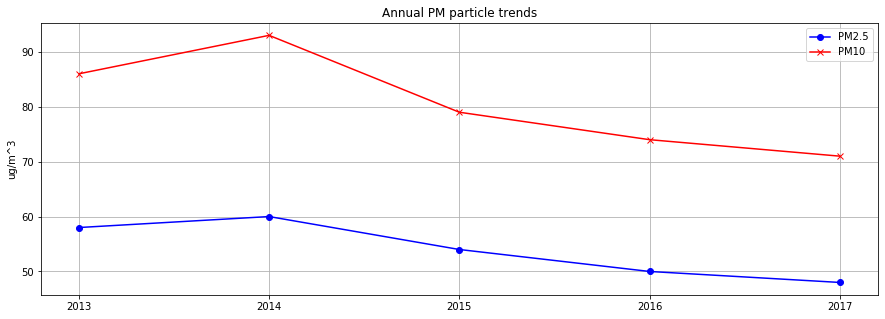

In [19]:
df = air_df[['PM2.5','PM10','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
ax.grid(True)
ax.set_title('Annual PM particle trends')
plt.plot(df['year'], df['PM2.5'], marker='o',color='b')
plt.plot(df['year'], df['PM10'], marker='x', color='r')
ax.set_ylabel('ug/m^3')
ax.set_xticks(df['year'])
ax.legend(['PM2.5', 'PM10'])


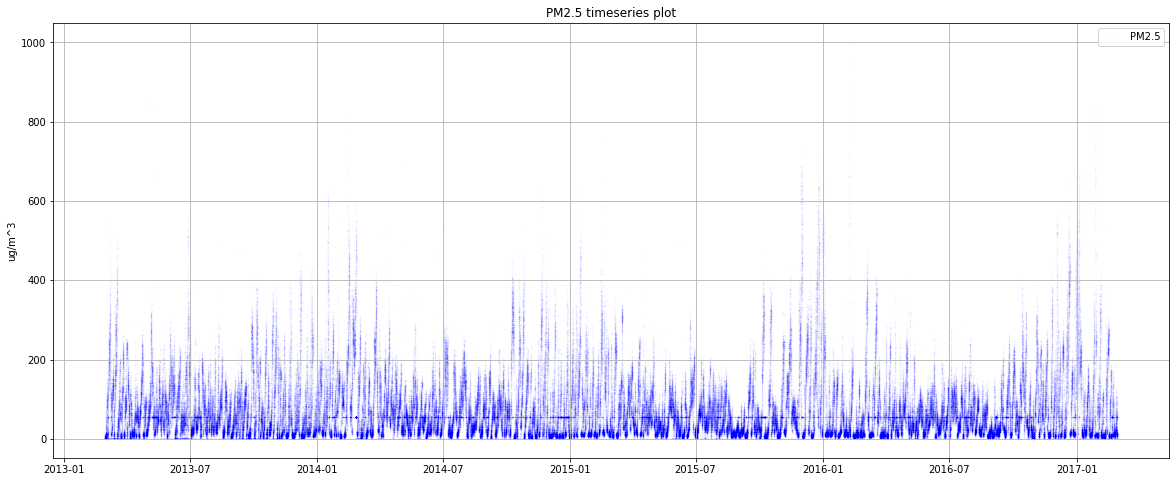

In [20]:
df = air_df[['PM2.5','PM10','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(20,8))
ax.grid(True)
ax.set_ylabel('ug/m^3')
ax.set_title('PM2.5 timeseries plot')
plt.scatter(air_df.index, air_df['PM2.5'], color='b', alpha=0.02, s=1)
# plt.scatter(air_df.index, air_df['PM10'], color='r', alpha=0.02, s=1)
ax.legend(['PM2.5'])

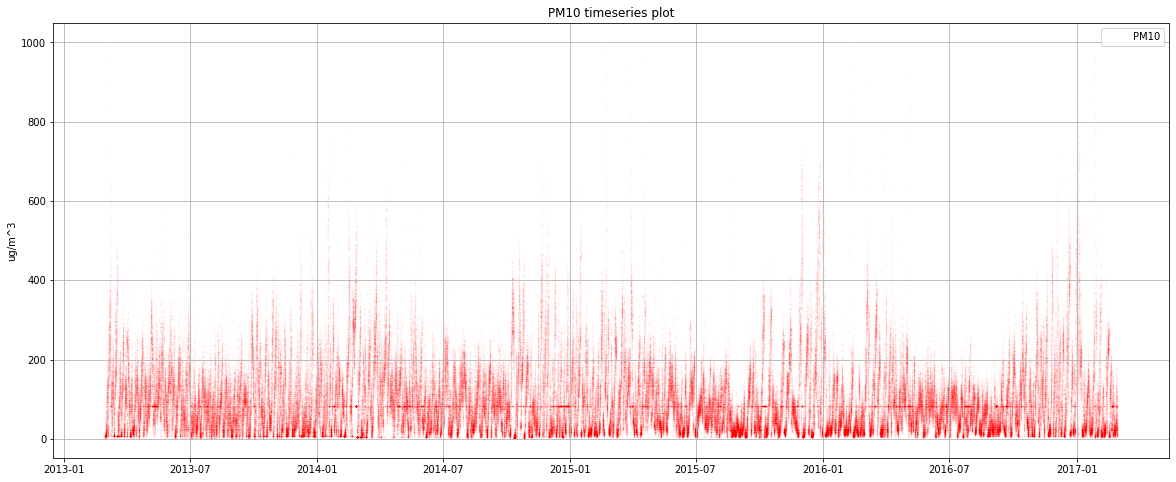

In [21]:
f,ax=plt.subplots(figsize=(20,8))
ax.grid(True)
ax.set_title('PM10 timeseries plot')
ax.set_ylabel('ug/m^3')
plt.scatter(air_df.index, air_df['PM10'], color='r', alpha=0.02, s=1)
ax.legend(['PM10'])

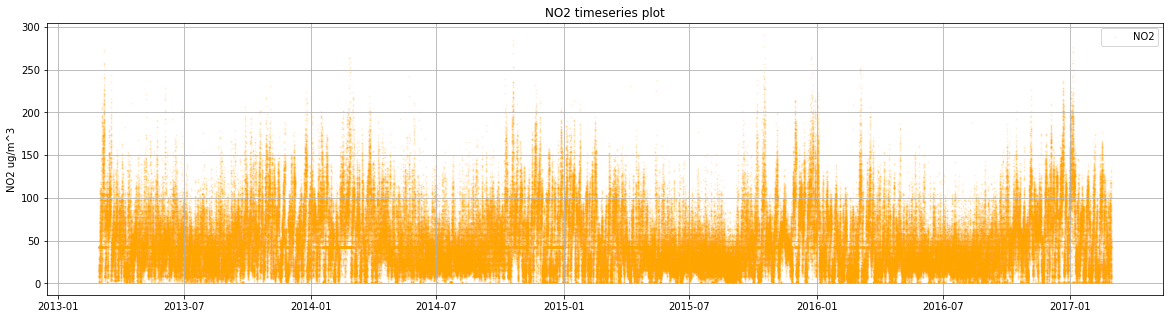

In [22]:
f,ax=plt.subplots(figsize=(20,5))
ax.grid(True)
ax.set_ylabel('NO2 ug/m^3')
ax.set_title('NO2 timeseries plot')
plt.scatter(air_df.index, air_df['NO2'], color='orange', alpha=0.1, s=1)
ax.legend(['NO2'])

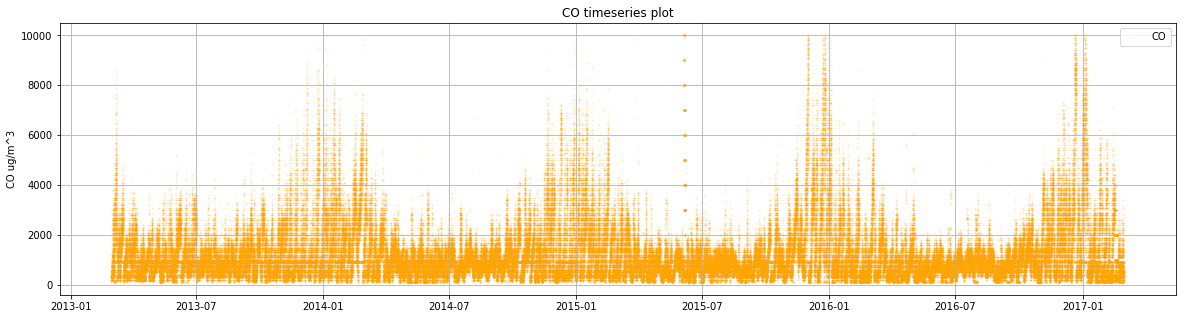

In [23]:
f,ax=plt.subplots(figsize=(20,5))
ax.grid(True)
ax.set_ylabel('CO ug/m^3')
ax.set_title('CO timeseries plot')
plt.scatter(air_df.index, air_df['CO'], color='orange', alpha=0.1, s=1)
ax.legend(['CO'])

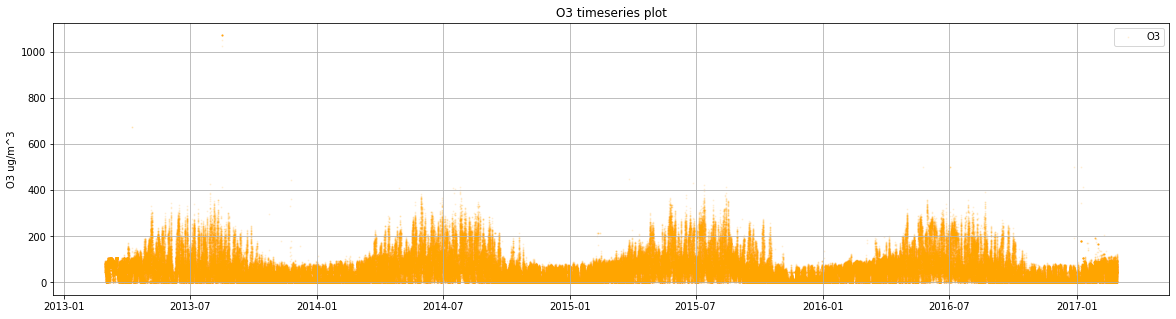

In [24]:
f,ax=plt.subplots(figsize=(20,5))
ax.grid(True)
ax.set_ylabel('O3 ug/m^3')
ax.set_title('O3 timeseries plot')
plt.scatter(air_df.index, air_df['O3'], color='orange', alpha=0.1, s=1)
ax.legend(['O3'])

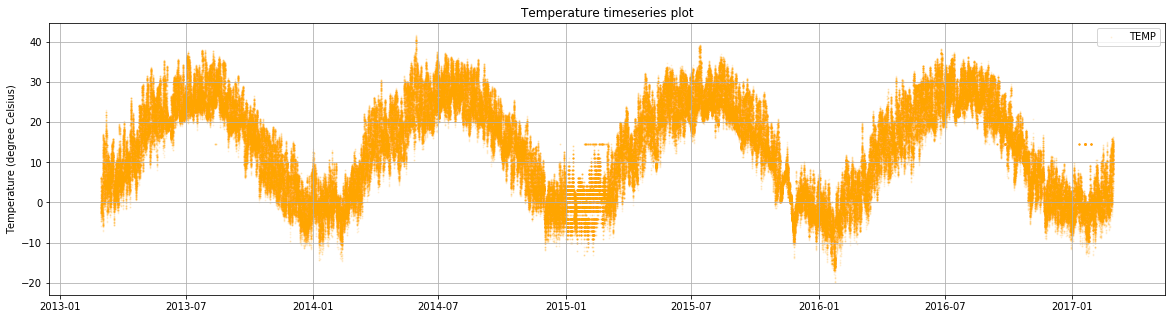

In [25]:
f,ax=plt.subplots(figsize=(20,5))
ax.grid(True)
ax.set_ylabel('Temperature (degree Celsius)')
ax.set_title('Temperature timeseries plot')
plt.scatter(air_df.index, air_df['TEMP'], color='orange', alpha=0.1, s=1)
ax.legend(['TEMP'])

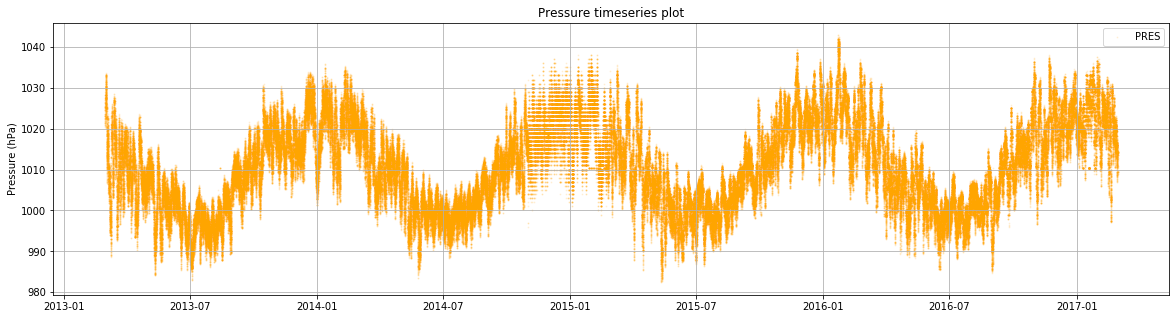

In [26]:
f,ax=plt.subplots(figsize=(20,5))
ax.grid(True)
ax.set_ylabel('Pressure (hPa)')
ax.set_title('Pressure timeseries plot')
plt.scatter(air_df.index, air_df['PRES'], color='orange', alpha=0.1, s=1)
ax.legend(['PRES'])

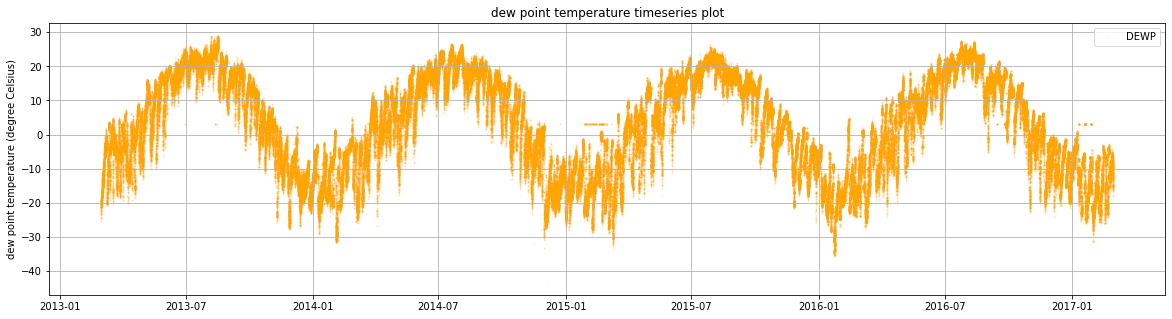

In [27]:
f,ax=plt.subplots(figsize=(20,5))
ax.grid(True)
ax.set_ylabel('dew point temperature (degree Celsius)')
ax.set_title('dew point temperature timeseries plot')
plt.scatter(air_df.index, air_df['DEWP'], color='orange', alpha=0.1, s=1)
ax.legend(['DEWP'])

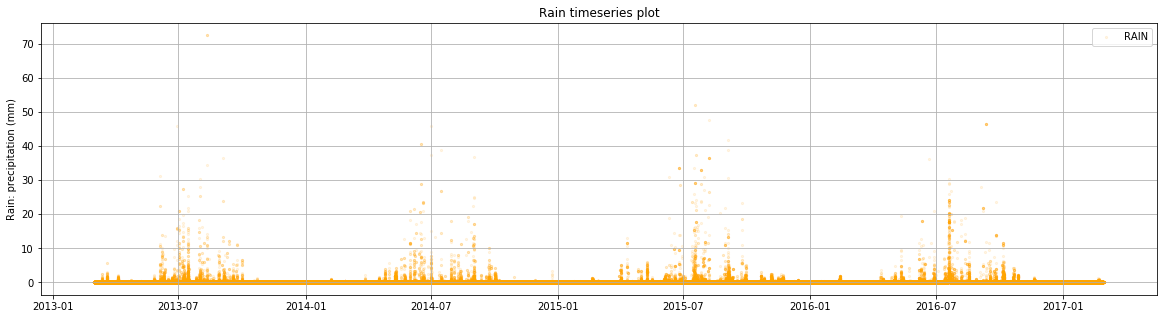

In [28]:
f,ax=plt.subplots(figsize=(20,5))
ax.grid(True)
ax.set_ylabel('Rain: precipitation (mm)')
ax.set_title('Rain timeseries plot')
plt.scatter(air_df.index, air_df['RAIN'], color='orange', alpha=0.1, s=5)
ax.legend(['RAIN'])

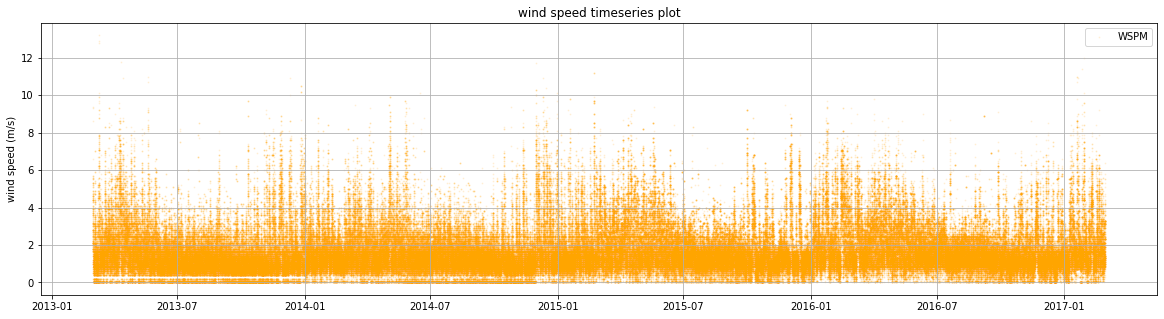

In [29]:
f,ax=plt.subplots(figsize=(20,5))
ax.grid(True)
ax.set_ylabel('wind speed (m/s)')
ax.set_title('wind speed timeseries plot')
plt.scatter(air_df.index, air_df['WSPM'], color='orange', alpha=0.1, s=1)
ax.legend(['WSPM'])

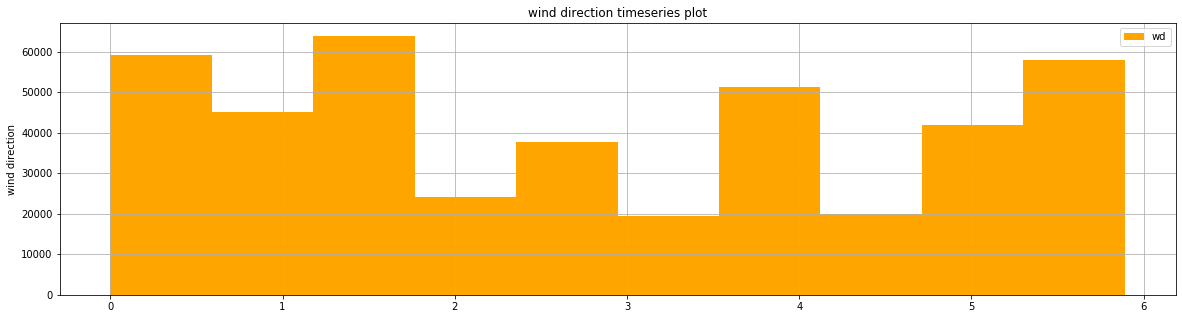

In [30]:
f,ax=plt.subplots(figsize=(20,5))
ax.grid(True)
ax.set_ylabel('wind direction')
ax.set_title('wind direction timeseries plot')
plt.hist( air_df['wd'], color='orange')
ax.legend(['wd'])

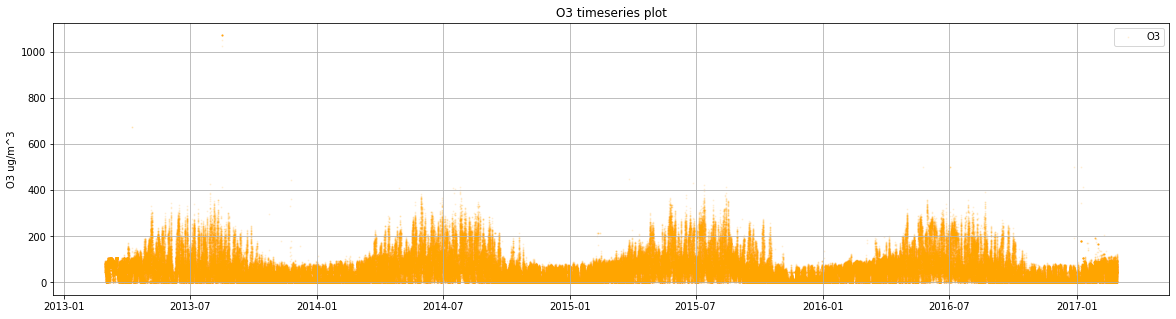

In [31]:
f,ax=plt.subplots(figsize=(20,5))
ax.grid(True)
ax.set_ylabel('O3 ug/m^3')
ax.set_title('O3 timeseries plot')
plt.scatter(air_df.index, air_df['O3'], color='orange', alpha=0.1, s=1)
ax.legend(['O3'])

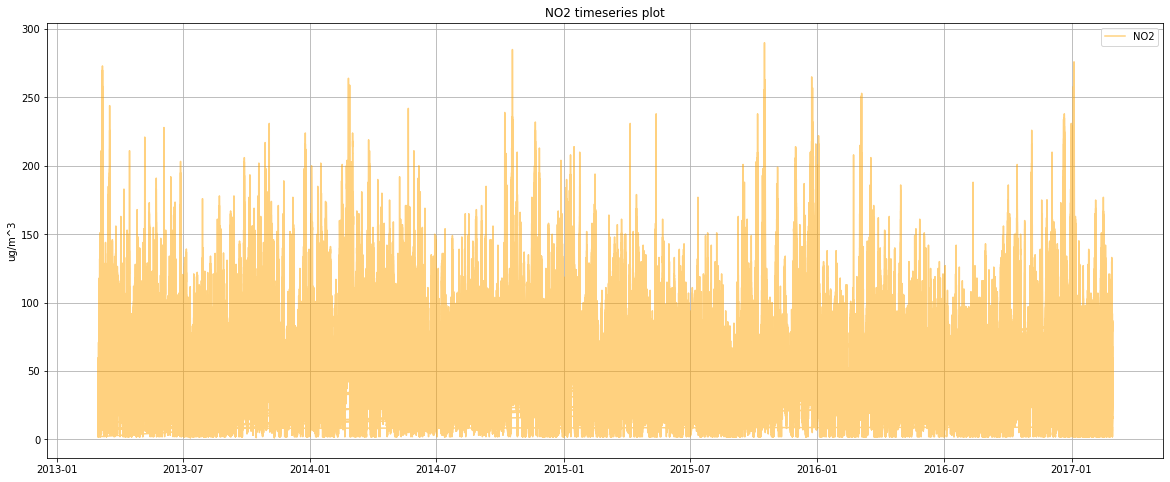

In [32]:
f,ax=plt.subplots(figsize=(20,8))
ax.grid(True)
ax.set_ylabel('ug/m^3')
ax.set_title('NO2 timeseries plot')
plt.plot(air_df.index, air_df['NO2'], color='orange', alpha=0.5)
ax.legend(['NO2'])

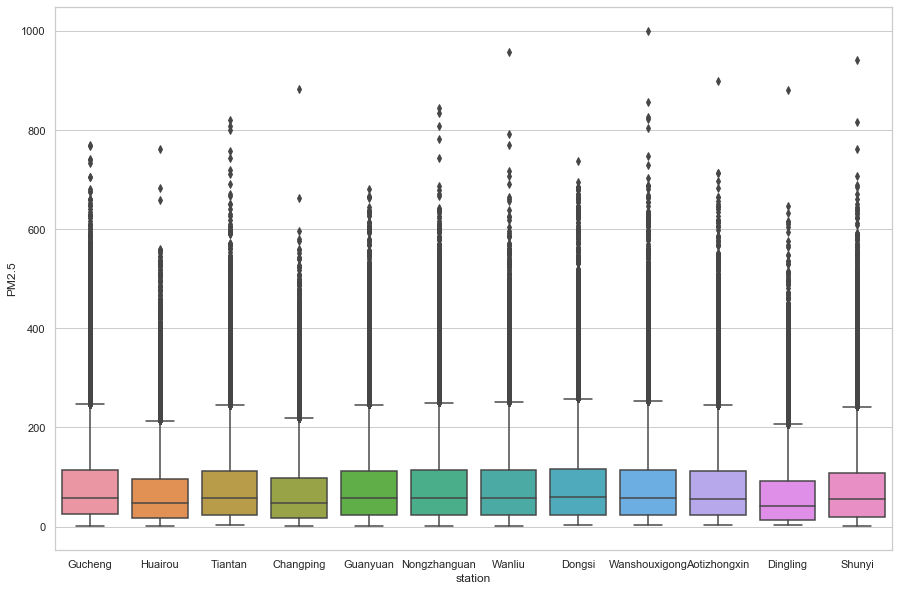

In [33]:
f = plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
sns.boxplot(x='station', y='PM2.5', data=air_df.dropna(axis=0).reset_index())


In [34]:
air_df.month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], inplace=True)


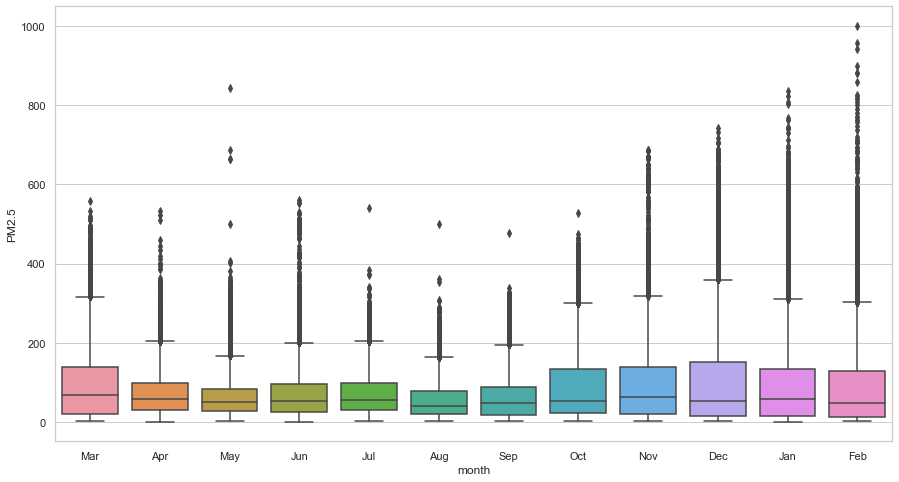

In [35]:
f = plt.figure(figsize=(15,8))
sns.set(style="whitegrid")
sns.boxplot(x='month', y='PM2.5', data=air_df.dropna(axis=0).reset_index())


In [36]:
df = air_df[['PM2.5','day_week','station']].groupby(["hour"]).median().reset_index().sort_values(ascending=True)
df = df.iloc[df['day_week'].map(custom_day).argsort()]
f,ax=plt.subplots(figsize=(15,5))
ax.grid(True)
ax.set_ylabel('PM2.5 ug/m^3')
plt.plot(df['day_week'], df['PM2.5'], marker='o')


KeyError: 'hour'

In [ ]:
df = air_df[['PM2.5','PM10','hour','station']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
ax.grid(True)
ax.set_title('Daily PM particle trends')
plt.plot(df['hour'], df['PM2.5'], marker='o',color='b')
plt.plot(df['hour'], df['PM10'], marker='x', color='r')
ax.set_ylabel('ug/m^3')
ax.set_xlabel('Hour')
ax.set_xticks(df['hour'])
ax.legend(['PM2.5', 'PM10'])


In [ ]:
f = plt.figure(figsize=(15,8))
sns.boxplot(x='hour', y='PM2.5', data=air_df.dropna(axis=0).reset_index())
ax.grid(True)


In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(air_df.corr(), center=0, ax=ax)
fig.tight_layout()

In [65]:
num_data = air_df.drop(columns=['No', 'date'])

In [39]:
# feature engineering 

# generate binary values using get_dummies
dum_df = pd.get_dummies(air_df['day_week'], columns=["day_week"])
# merge with main df bridge_df on key values
num_data = num_data.join(dum_df)

In [84]:
num_data.month.replace(['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], [1,2,3,4,5,6,7,8,9,10,11,12], 
                       inplace=True)


In [41]:
# # generate binary values using get_dummies
# dum_df = pd.get_dummies(air_df['station'], columns=["station"])
# # merge with main df bridge_df on key values
# num_data = num_data.join(dum_df)

In [72]:
num_data = air_df.drop(columns=['date'])

In [93]:
num_data.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'],
      dtype='object')

In [81]:
num_data = num_data.drop(columns=[ 'date'])

In [96]:
num_data.head()

year  month  day  hour  PM2.5  PM10  SO2   NO2     CO  \
timestamp                                                                    
2013-03-01 00:00:00  2013      3    1     0    6.0  18.0  5.0  43.0  800.0   
2013-03-01 01:00:00  2013      3    1     1    6.0  15.0  5.0  43.0  800.0   
2013-03-01 02:00:00  2013      3    1     2    5.0  18.0  7.0  43.0  700.0   
2013-03-01 03:00:00  2013      3    1     3    6.0  20.0  6.0  43.0  900.0   
2013-03-01 04:00:00  2013      3    1     4    5.0  17.0  5.0  43.0  600.0   

                       O3  TEMP    PRES  DEWP  RAIN        wd  WSPM  
timestamp                                                            
2013-03-01 00:00:00  88.0   0.1  1021.1 -18.6   0.0  5.497787   4.4  
2013-03-01 01:00:00  88.0  -0.3  1021.5 -19.0   0.0  5.497787   4.0  
2013-03-01 02:00:00  52.0  -0.7  1021.5 -19.8   0.0  5.105088   4.6  
2013-03-01 03:00:00  45.0  -1.0  1022.7 -21.2   0.0  4.712389   2.8  
2013-03-01 04:00:00  73.0  -1.3  1023.0 -21.4   0.0  5.105088   3.6

In [59]:
num_data = num_data.drop(columns=['timestamp'])

In [95]:
num_data.to_csv('num_data.csv', index_label=False)

### Model Training 

To prepare the data for the task, we will apply several steps to it. To smooth the variation in the curve to be predicted and be able to properly reconstruct it, we are going to apply the natural logarithm to the data. Also, our target is to input 24 timesteps to the network (a complete day, containing 24 hourly records) and make the network predict the next 24 timesteps (the next day). To do so, we want to pivot the next 48 hours for each sample into columns. We will apply this to the whole dataset and after it select the training examples with a 50% overlap: we will make a prediction not only at midnight but also at noon, which will force the data to be more general and generate twice as many examples.

The next step is to split the series into features and labels: the first 24 hours of each row will be used to predict (X) and the next 24 hours will be the levels that we aim to predict (y). Also we need to split before starting to do more data processing into train and test data: 20% of the data will not be used for learning. Instead, it will be used to check that the model is able to generalize to new data properly. Take into account that these are time-stamped data and we are training a stateful network: make sure that the data is kept in its original order!

Also, it is important to notice that Keras requires a certain shape for the input data: a three dimensional input array with the shape (batch-size, timesteps, features). If we are going predict 24 hours based solely on the previous 24 hours records, we have 24 timesteps and 1 single feature (the NO_2 levels). We also want the data to be scaled in the interval  [0,1]  - most machine learning techniques perform better with normalized features. However, make sure to scale the data only to the training data (you technically do not have the test one, that is what you want to predict): doing so is a form of look-ahead bias and we should keep it legit.

In [47]:
num_data = pd.read_csv('num_data.csv')

In [48]:
num_data.describe()

year         month           day          hour         PM2.5  \
count  5.049216e+06  5.049216e+06  5.049216e+06  5.049216e+06  5.049216e+06   
mean   2.014663e+03  6.522930e+00  1.572964e+01  1.150000e+01  7.927849e+01   
std    1.177197e+00  3.448704e+00  8.800093e+00  6.922187e+00  8.005671e+01   
min    2.013000e+03  1.000000e+00  1.000000e+00  0.000000e+00  2.000000e+00   
25%    2.014000e+03  4.000000e+00  8.000000e+00  5.750000e+00  2.100000e+01   
50%    2.015000e+03  7.000000e+00  1.600000e+01  1.150000e+01  5.500000e+01   
75%    2.016000e+03  1.000000e+01  2.300000e+01  1.725000e+01  1.090000e+02   
max    2.017000e+03  1.200000e+01  3.100000e+01  2.300000e+01  9.990000e+02   

               PM10           SO2           NO2            CO            O3  \
count  5.049216e+06  5.049216e+06  5.049216e+06  5.049216e+06  5.049216e+06   
mean   1.042562e+02  1.564151e+01  5.041863e+01  1.214493e+03  5.698187e+01   
std    9.110865e+01  2.145540e+01  3.464198e+01  1.133542e+03  5.580235e+01   
min    2.000000e+00  2.856000e-01  1.026500e+00  1.000000e+02  2.142000e-01   
25%    3.600000e+01  3.000000e+00  2.400000e+01  5.000000e+02  1.200000e+01   
50%    8.200000e+01  7.000000e+00  4.300000e+01  9.000000e+02  4.500000e+01   
75%    1.440000e+02  1.900000e+01  7.000000e+01  1.500000e+03  8.000000e+01   
max    9.990000e+02  5.000000e+02  2.900000e+02  1.000000e+04  1.071000e+03   

       ...          RAIN            wd          WSPM        Friday  \
count  ...  5.049216e+06  5.049216e+06  5.049216e+06  5.049216e+06   
mean   ...  6.441602e-02  2.739779e+00  1.729461e+00  1.430527e-01   
std    ...  8.206250e-01  1.896400e+00  1.245946e+00  3.501266e-01   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  0.000000e+00  1.178097e+00  9.000000e-01  0.000000e+00   
50%    ...  0.000000e+00  2.356194e+00  1.400000e+00  0.000000e+00   
75%    ...  0.000000e+00  4.319690e+00  2.200000e+00  0.000000e+00   
max    ...  7.250000e+01  5.890486e+00  1.320000e+01  1.000000e+00   

             Monday      Saturday        Sunday      Thursday       Tuesday  \
count  5.049216e+06  5.049216e+06  5.049216e+06  5.049216e+06  5.049216e+06   
mean   1.430527e-01  1.430527e-01  1.430527e-01  1.423682e-01  1.430527e-01   
std    3.501266e-01  3.501266e-01  3.501266e-01  3.494275e-01  3.501266e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

          Wednesday  
count  5.049216e+06  
mean   1.423682e-01  
std    3.494275e-01  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00  

[8 rows x 23 columns]

In [49]:
a = num_data.iloc[0:-1]
a.head()

timestamp  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO  \
0  2013-03-01 00:00:00  2013      3    1     0    6.0  18.0  5.0  43.0  800.0   
1  2013-03-01 00:00:00  2013      3    1     0    6.0  18.0  5.0  43.0  800.0   
2  2013-03-01 00:00:00  2013      3    1     0    6.0  18.0  5.0  43.0  800.0   
3  2013-03-01 00:00:00  2013      3    1     0    6.0  18.0  5.0  43.0  800.0   
4  2013-03-01 00:00:00  2013      3    1     0    6.0  18.0  5.0  43.0  800.0   

   ...  WSPM        date  day_week  Friday  Monday  Saturday  Sunday Thursday  \
0  ...   4.4  2013-03-01    Friday       1       0         0       0        0   
1  ...   4.4  2013-03-01    Friday       1       0         0       0        0   
2  ...   4.4  2013-03-01    Friday       1       0         0       0        0   
3  ...   4.4  2013-03-01    Friday       1       0         0       0        0   
4  ...   4.4  2013-03-01    Friday       1       0         0       0        0   

  Tuesday  Wednesday  
0       0          0  
1       0          0  
2       0          0  
3       0          0  
4       0          0  

[5 rows x 26 columns]

In [61]:
# linear regression 

from sklearn.linear_model import LinearRegression
linearRegression=LinearRegression()
linearRegression.fit(X_train,y_train)

y_pred=linearRegression.predict(X_test)
linearRegression.score(X_test, y_test)


NameError: name 'X_train' is not defined

NameError: name 'y_test' is not defined

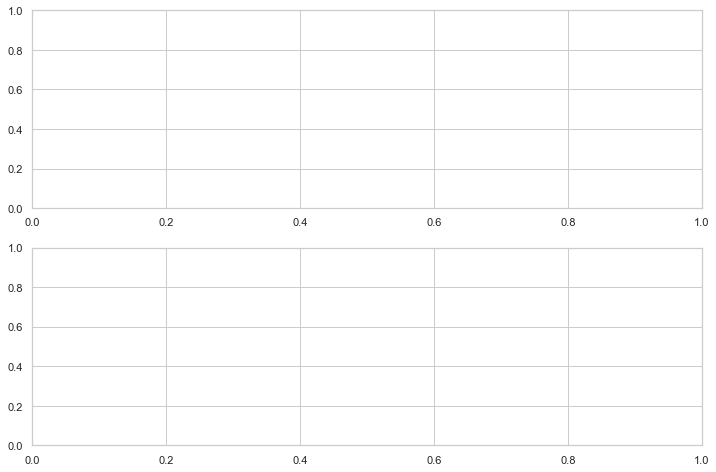

In [62]:
n_results=100
fig, ax=plt.subplots(2,1,figsize=(12,8))
ax[0].plot(y_test.values[:n_results], color="red")
ax[1].plot(y_pred[:n_results], color="green")

In [ ]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


### Model Training 

In [ ]:
import numpy as np
# import tensorflow.compat.v1 as tf
# import tensorflow.compat.v1.nn.rnn_cell as rnn
import matplotlib.pyplot as plt
import datetime

In [ ]:
num_data.drop(['timest'])

In [64]:
num_data

year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  ...  \
0        2013      3    1     0    6.0  18.0   5.0  43.0  800.0  88.0  ...   
1        2013      3    1     0    6.0  18.0   5.0  43.0  800.0  88.0  ...   
2        2013      3    1     0    6.0  18.0   5.0  43.0  800.0  88.0  ...   
3        2013      3    1     0    6.0  18.0   5.0  43.0  800.0  88.0  ...   
4        2013      3    1     0    6.0  18.0   5.0  43.0  800.0  88.0  ...   
...       ...    ...  ...   ...    ...   ...   ...   ...    ...   ...  ...   
5049211  2017      2   28    23   15.0  22.0  13.0  34.0  500.0  60.0  ...   
5049212  2017      2   28    23   15.0  22.0  13.0  34.0  500.0  60.0  ...   
5049213  2017      2   28    23   15.0  22.0  13.0  34.0  500.0  60.0  ...   
5049214  2017      2   28    23   15.0  22.0  13.0  34.0  500.0  60.0  ...   
5049215  2017      2   28    23   15.0  22.0  13.0  34.0  500.0  60.0  ...   

         WSPM        date  day_week  Friday  Monday  Saturday Sunday Thursday  \
0         4.4  2013-03-01    Friday       1       0         0      0        0   
1         4.4  2013-03-01    Friday       1       0         0      0        0   
2         4.4  2013-03-01    Friday       1       0         0      0        0   
3         4.4  2013-03-01    Friday       1       0         0      0        0   
4         4.4  2013-03-01    Friday       1       0         0      0        0   
...       ...         ...       ...     ...     ...       ...    ...      ...   
5049211   1.4  2017-02-28   Tuesday       0       0         0      0        0   
5049212   1.4  2017-02-28   Tuesday       0       0         0      0        0   
5049213   1.4  2017-02-28   Tuesday       0       0         0      0        0   
5049214   1.4  2017-02-28   Tuesday       0       0         0      0        0   
5049215   1.4  2017-02-28   Tuesday       0       0         0      0        0   

         Tuesday  Wednesday  
0              0          0  
1              0          0  
2              0          0  
3              0          0  
4              0          0  
...          ...        ...  
5049211        1          0  
5049212        1          0  
5049213        1          0  
5049214        1          0  
5049215        1          0  

[5049216 rows x 25 columns]

In [63]:
X = num_data.drop('PM2.5', axis=1)
y = num_data['PM2.5']

from sklearn.preprocessing import StandardScaler

standardScaler=StandardScaler()
X_scaled=standardScaler.fit_transform(X)

train_size=int(y.shape[0]*0.8)
test_size=y.shape[0]-train_size


X_train=X_scaled[:train_size]
y_train=y[:train_size]
X_test=X_scaled[train_size:]
y_test=y[train_size:]

ValueError: could not convert string to float: '2013-03-01'

In [ ]:
# Just one feature, the time series
num_inputs = X_train.shape[1]
# Num of steps in each batch
num_time_steps = 12
# 100 neuron layer, play with this
num_neurons = 100
# Just one output, predicted time series
num_outputs = 1

## You can also try increasing iterations, but decreasing learning rate
# learning rate you can play with this
learning_rate = 0.1
# how many iterations to go through (training steps), you can play with this
num_train_iterations = 50
# Size of the batch of data
batch_size = BATCH_SIZE = 128

In [ ]:
TIME_STEPS = 10
BATCH_SIZE = 128
HIDDEN_UNITS = 1
HIDDEN_UNITS1=1

LEARNING_RATE=0.01


EPOCH = 50

TRAIN_EXAMPLES= len(y_train)
TEST_EXAMPLES= len(y_test)

num_of_inputs = X_train.shape[1]
sum_sample = TRAIN_EXAMPLES + TEST_EXAMPLES


In [ ]:
import tensorflow as tf
X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

In [ ]:
# Also play around with GRUCell
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu),
    output_size=num_outputs) 

In [ ]:
import tensorflow.contrib.rnn as rnn

#lstm instance
gru_cell=rnn.GRUCell(num_units=HIDDEN_UNITS)

#lstm instance
lstm_cell=rnn.LSTMCell(num_units=HIDDEN_UNITS1)

#     GRU =  rnn.MultiRNNCell(cells=[gru_cell])
#     LSTM =  rnn.MultiRNNCell(cells=[lstm_cell])

GRU_GRU =  rnn.MultiRNNCell(cells=[gru_cell,gru_cell])
GRU_LSTM = rnn.MultiRNNCell(cells=[gru_cell,lstm_cell])
LSTM_GRU = rnn.MultiRNNCell(cells=[lstm_cell,gru_cell])
LSTM_LSTM = rnn.MultiRNNCell(cells=[lstm_cell,lstm_cell])

# # Also play around with GRUCell
# cell = tf.contrib.rnn.OutputProjectionWrapper(
#     tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu),
#     output_size=num_outputs) 

In [ ]:
outputs, states = tf.nn.dynamic_rnn(GRU_LSTM, X, dtype=tf.float32)

In [ ]:
loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

In [ ]:
init = tf.global_variables_initializer()

In [ ]:
saver = tf.train.Saver()

### Session

In [54]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)

NameError: name 'tf' is not defined

In [ ]:
train_scaled

In [ ]:
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = next_batch(X_train,batch_size,num_time_steps)
        sess.run(train, feed_dict={X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    # Save Model for Later
    saver.save(sess, "./ex_time_series_model")

In [ ]:
#--------------------------------------Define Graph---------------------------------------------------#
graph=tf.Graph()

with graph.as_default():

    #------------------------------------construct LSTM------------------------------------------#
    #place hoder
    X_p=tf.placeholder(dtype=tf.float32,shape=(None, TIME_STEPS,num_of_inputs),name="input_placeholder")
    y_p=tf.placeholder(dtype=tf.float32,shape=(None, TIME_STEPS, 1),name="pred_placeholder")

    #lstm instance
    gru_cell=rnn.GRUCell(num_units=HIDDEN_UNITS)
    
    #lstm instance
    lstm_cell=rnn.LSTMCell(num_units=HIDDEN_UNITS1)

#     GRU =  rnn.MultiRNNCell(cells=[gru_cell])
#     LSTM =  rnn.MultiRNNCell(cells=[lstm_cell])
    
    GRU_GRU =  rnn.MultiRNNCell(cells=[gru_cell,gru_cell])
    GRU_LSTM = rnn.MultiRNNCell(cells=[gru_cell,lstm_cell])
    LSTM_GRU = rnn.MultiRNNCell(cells=[lstm_cell,gru_cell])
    LSTM_LSTM = rnn.MultiRNNCell(cells=[lstm_cell,lstm_cell])
    
    
    #initialize to zero
    init_state=GRU_LSTM.zero_state(batch_size=BATCH_SIZE,dtype=tf.float32)
    
    #dynamic rnn
    outputs,states=tf.nn.dynamic_rnn(cell=GRU_LSTM,inputs=X_p,initial_state=init_state,dtype=tf.float32)
    #print(outputs.shape)
    h=outputs[:,-1,:]
    print(h)
    #--------------------------------------------------------------------------------------------#

    #---------------------------------define loss and optimizer----------------------------------#
    mse=tf.losses.mean_squared_error(labels=y_p,predictions=h)
    #print(loss.shape)
    
    #Alter Optimizer? 
    optimizer=tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss=mse)
    init=tf.global_variables_initializer()


In [ ]:
#-------------------------------------------Define Session---------------------------------------#
with tf.Session(graph=graph) as sess:
    sess.run(init)
    
    start = datetime.datetime.now()
    average_train_loss=[]
    average_test_loss=[]
    
    for epoch in range(1,EPOCH+1):
        results = np.zeros(shape=(TEST_EXAMPLES, 1))
        train_losses=[]
        test_losses=[]
        print("epoch:",epoch)
        
        for j in range(TRAIN_EXAMPLES//BATCH_SIZE):
            
            X_batch, y_batch = ts_data
            _,train_loss=sess.run(
                    fetches=(optimizer,mse),
                    feed_dict={
                            X_p:X_train[j*BATCH_SIZE:(j+1)*BATCH_SIZE],
                            y_p:y_train[j*BATCH_SIZE:(j+1)*BATCH_SIZE]
                        }
            )
            print(train_loss, 'train_loss')
            train_losses.append(train_loss)
        average_train_losses = sum(train_losses) / len(train_losses)
        print("average training loss:", sum(train_losses) / len(train_losses))
        average_train_loss.append(average_train_losses)   


        for j in range(TEST_EXAMPLES//BATCH_SIZE):
            result,test_loss=sess.run(
                    fetches=(h,mse),
                    feed_dict={
                            X_p:X_test[j*BATCH_SIZE:(j+1)*BATCH_SIZE],
                            y_p:y_test[j*BATCH_SIZE:(j+1)*BATCH_SIZE]
                        }
            )
            results[j*BATCH_SIZE:(j+1)*BATCH_SIZE]=result
            test_losses.append(test_loss)
        average_test_losses = sum(test_losses) / len(test_losses)
        print("average test loss:", sum(test_losses) / len(test_losses))
        average_test_loss.append(average_test_losses)    
        
    end = datetime.datetime.now()
    print(end - start)
    
    print(np.std(results[0:80000]))
#    plt.plot(results,'b')
#    plt.show()
    plt.plot(average_train_loss,'g')
    plt.show()
    
    np.savetxt('multiGRU_LSTM_training_loss_y.txt',average_train_loss)
    np.savetxt('multiGRU_LSTM_testing_loss_y.txt',average_test_loss)
    np.savetxt('multiGRU_LSTM_result_y.txt',results[0:80000])